## Before you start

In [ ]:
!nvidia-smi

Wed Nov 22 04:15:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Download the data

In [ ]:
# https://www.kaggle.com/datasets/saikatdatta1994/tea-leaf-disease

In [ ]:
from google.colab import files

# Upload the Kaggle API key
files.upload()

In [ ]:
import os

# Move the Kaggle API key to the required location
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the API key
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
import kaggle

# Define the username and dataset name
username = "saikatdatta1994"
dataset_name = "tea-leaf-disease"

# Download the dataset
kaggle.api.dataset_download_files(username + '/' + dataset_name, unzip=True)

## Prepare the Data

Dataset Structure
```
Dataset
│
└───train
│   └───ClassA
│       │   ClassA_1.jpg
│       │   ClassA_2.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_1.jpg
│       │   ClassB_2.jpg
│       │   ...
│   └───...
└───test
│   └───ClassA
│       │   ClassA_9090.jpg
│       │   ClassA_9895.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2343.jpg
│       │   ClassB_2312.jpg
│       │   ...
│   └───...
└───val
│   └───ClassA
│       │   ClassA_3070.jpg
│       │   ClassA_2845.jpg
│       │   ...
│   └───ClassB
│       │   ClassB_2903.jpg
│       │   ClassB_2232.jpg
│       │   ...
│   └───...
```


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
!mkdir '/content/dataset'
DATA_DIR='/content/dataset'

In [ ]:
source_dataset_path = '/content/Tea_Leaf_Disease'
destination_dataset_path = '/content/dataset'

In [ ]:
os.makedirs(os.path.join(destination_dataset_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(destination_dataset_path, 'test'), exist_ok=True)
os.makedirs(os.path.join(destination_dataset_path, 'val'), exist_ok=True)

In [ ]:
# List of classes
classes = os.listdir(source_dataset_path)

# Loop through each class
for class_name in classes:
    class_dir = os.path.join(source_dataset_path, class_name)

    # Split the images for the current class into train, test, and val sets
    train_images, test_images = train_test_split(os.listdir(class_dir), test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    # Create subdirectories for each class in train, test, and val
    os.makedirs(os.path.join(destination_dataset_path, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(destination_dataset_path, 'test', class_name), exist_ok=True)
    os.makedirs(os.path.join(destination_dataset_path, 'val', class_name), exist_ok=True)

    # Move images to their respective directories
    for image in train_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'train', class_name, image))
    for image in test_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'test', class_name, image))
    for image in val_images:
        shutil.copy(os.path.join(class_dir, image), os.path.join(destination_dataset_path, 'val', class_name, image))


## Install YOLOv8


In [ ]:
# Pip install method

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [ ]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-cls.pt')

# Train the model
results = model.train(data='/content/dataset', epochs=35, imgsz=64)

100%|██████████| 5.28M/5.28M [00:00<00:00, 103MB/s]
Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/dataset, epochs=35, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, bo

## Validate Custom Model

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/classify/train/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1   # top1 accuracy
metrics.top5   # top5 accuracy

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1442566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 4693 images in 6 classes ✅ 
val: /content/dataset/val... found 587 images in 6 classes ✅ 
test: /content/dataset/test... found 587 images in 6 classes ✅ 
val: Scanning /content/dataset/val... 587 images, 0 corrupt: 100%|██████████| 587/587 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 37/37 [00:01<00:00, 29.48it/s]
                   all      0.973          1
Speed: 0.0ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


1.0

## Performance metrices

In [ ]:
from IPython.display import display, Image

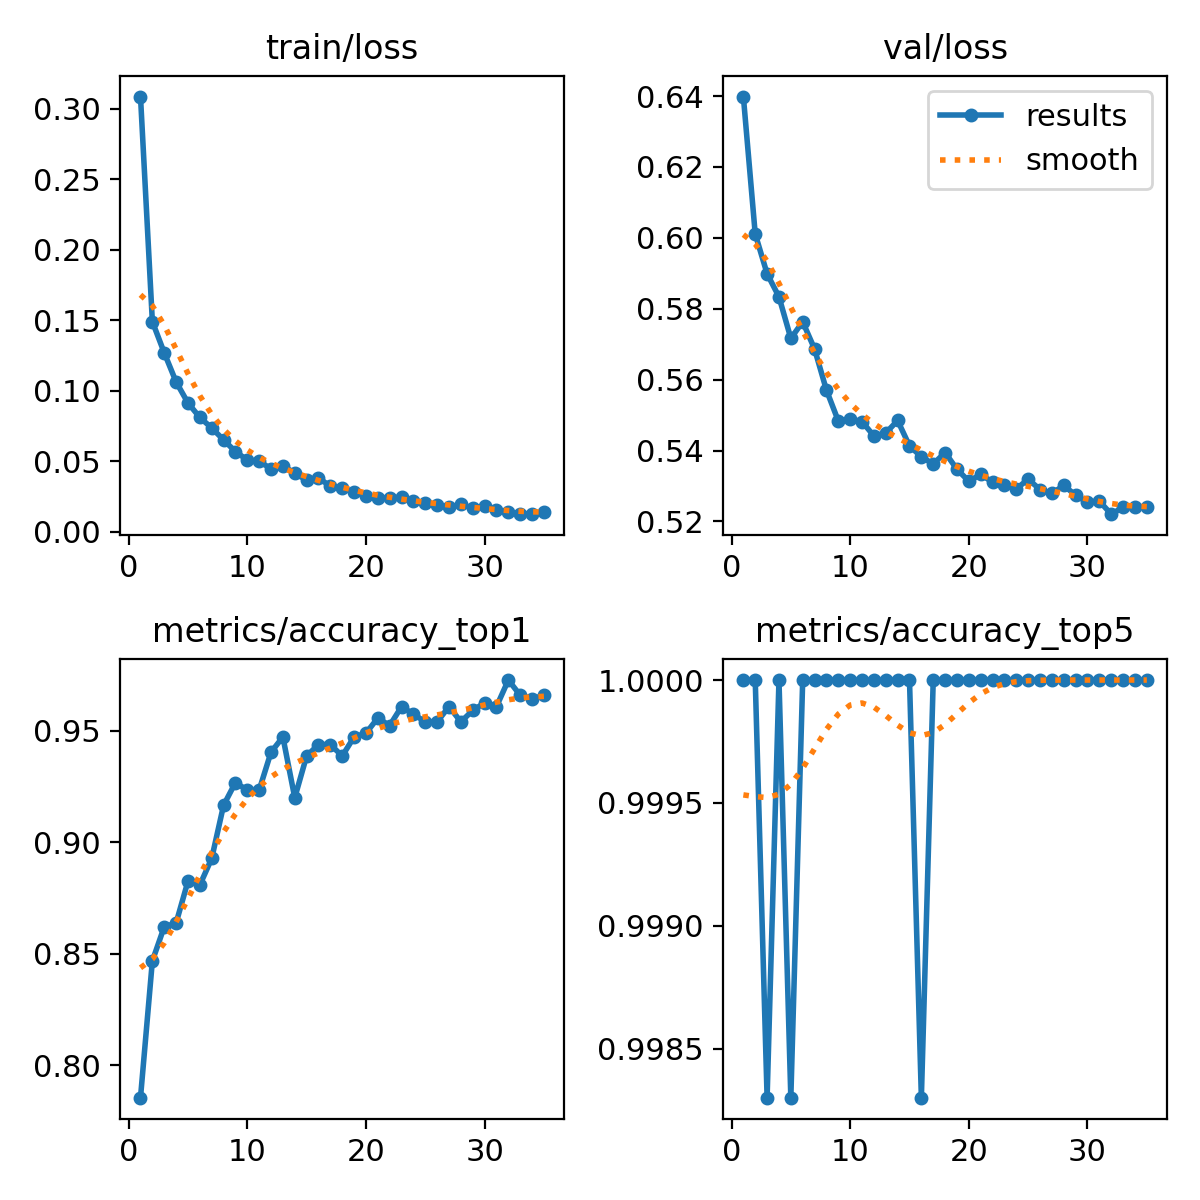

In [ ]:
display(Image(filename="/content/runs/classify/train/results.png"))

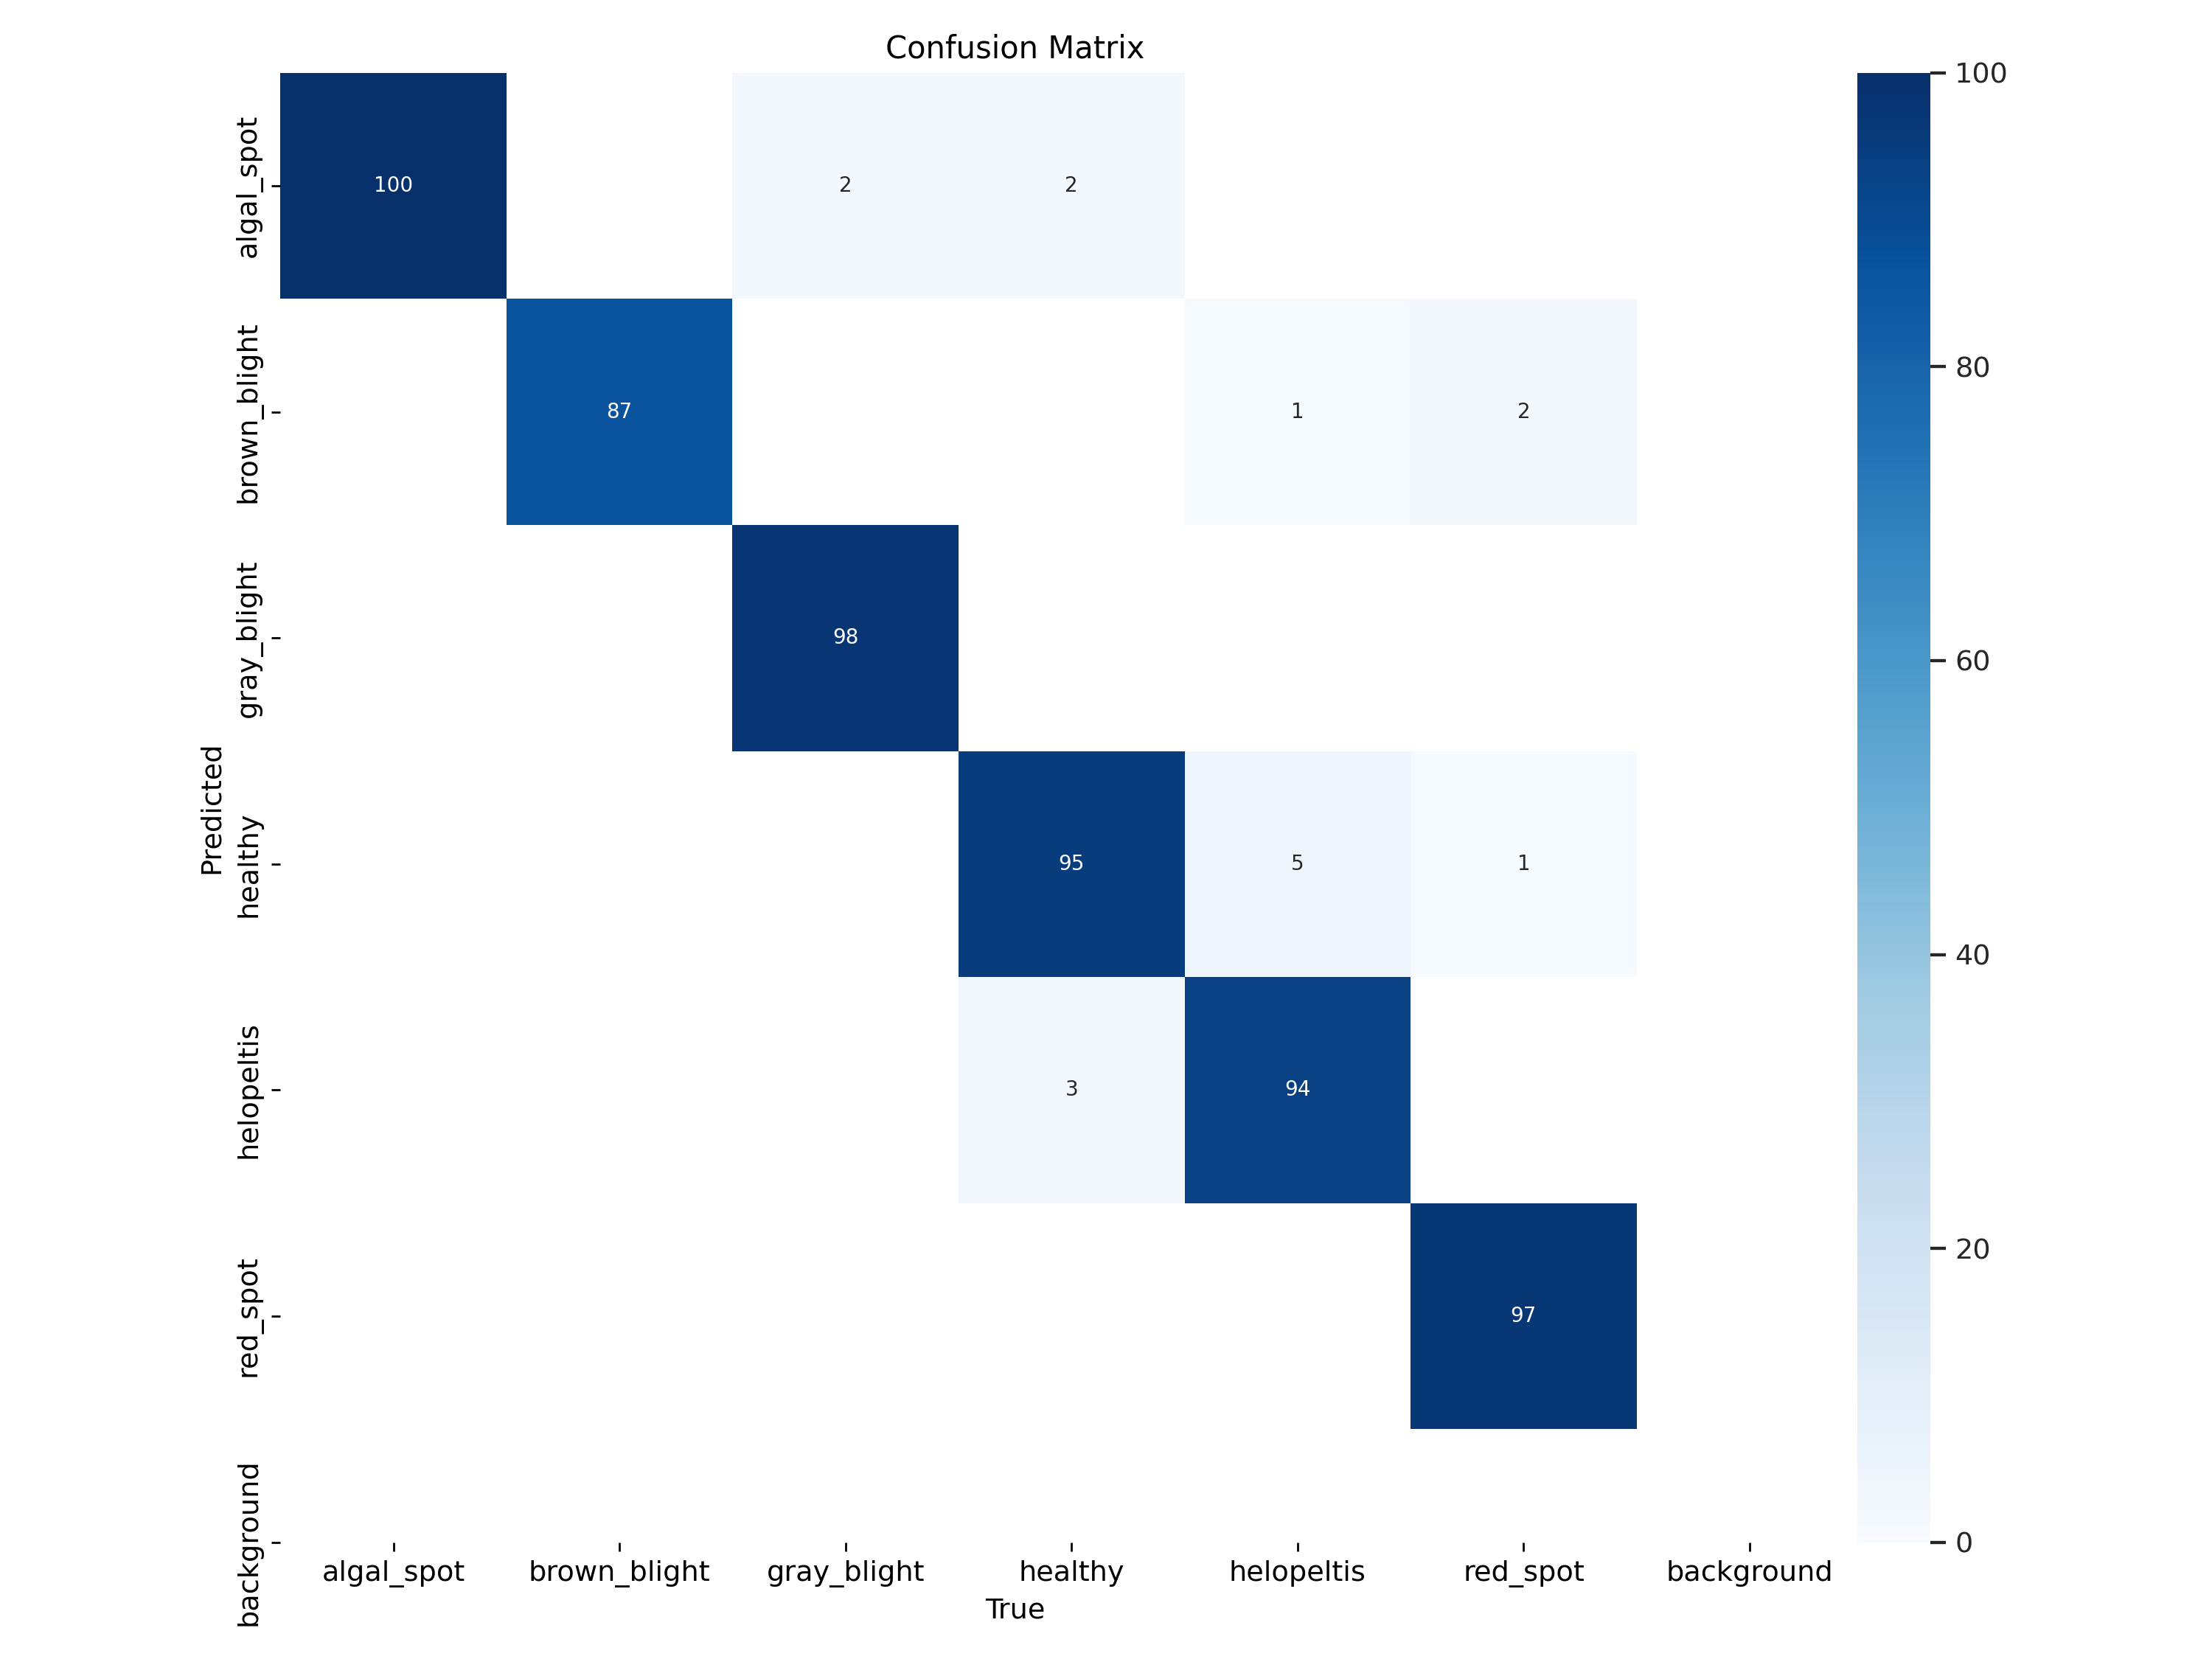

In [ ]:
display(Image(filename="/content/runs/classify/train/confusion_matrix.png"))

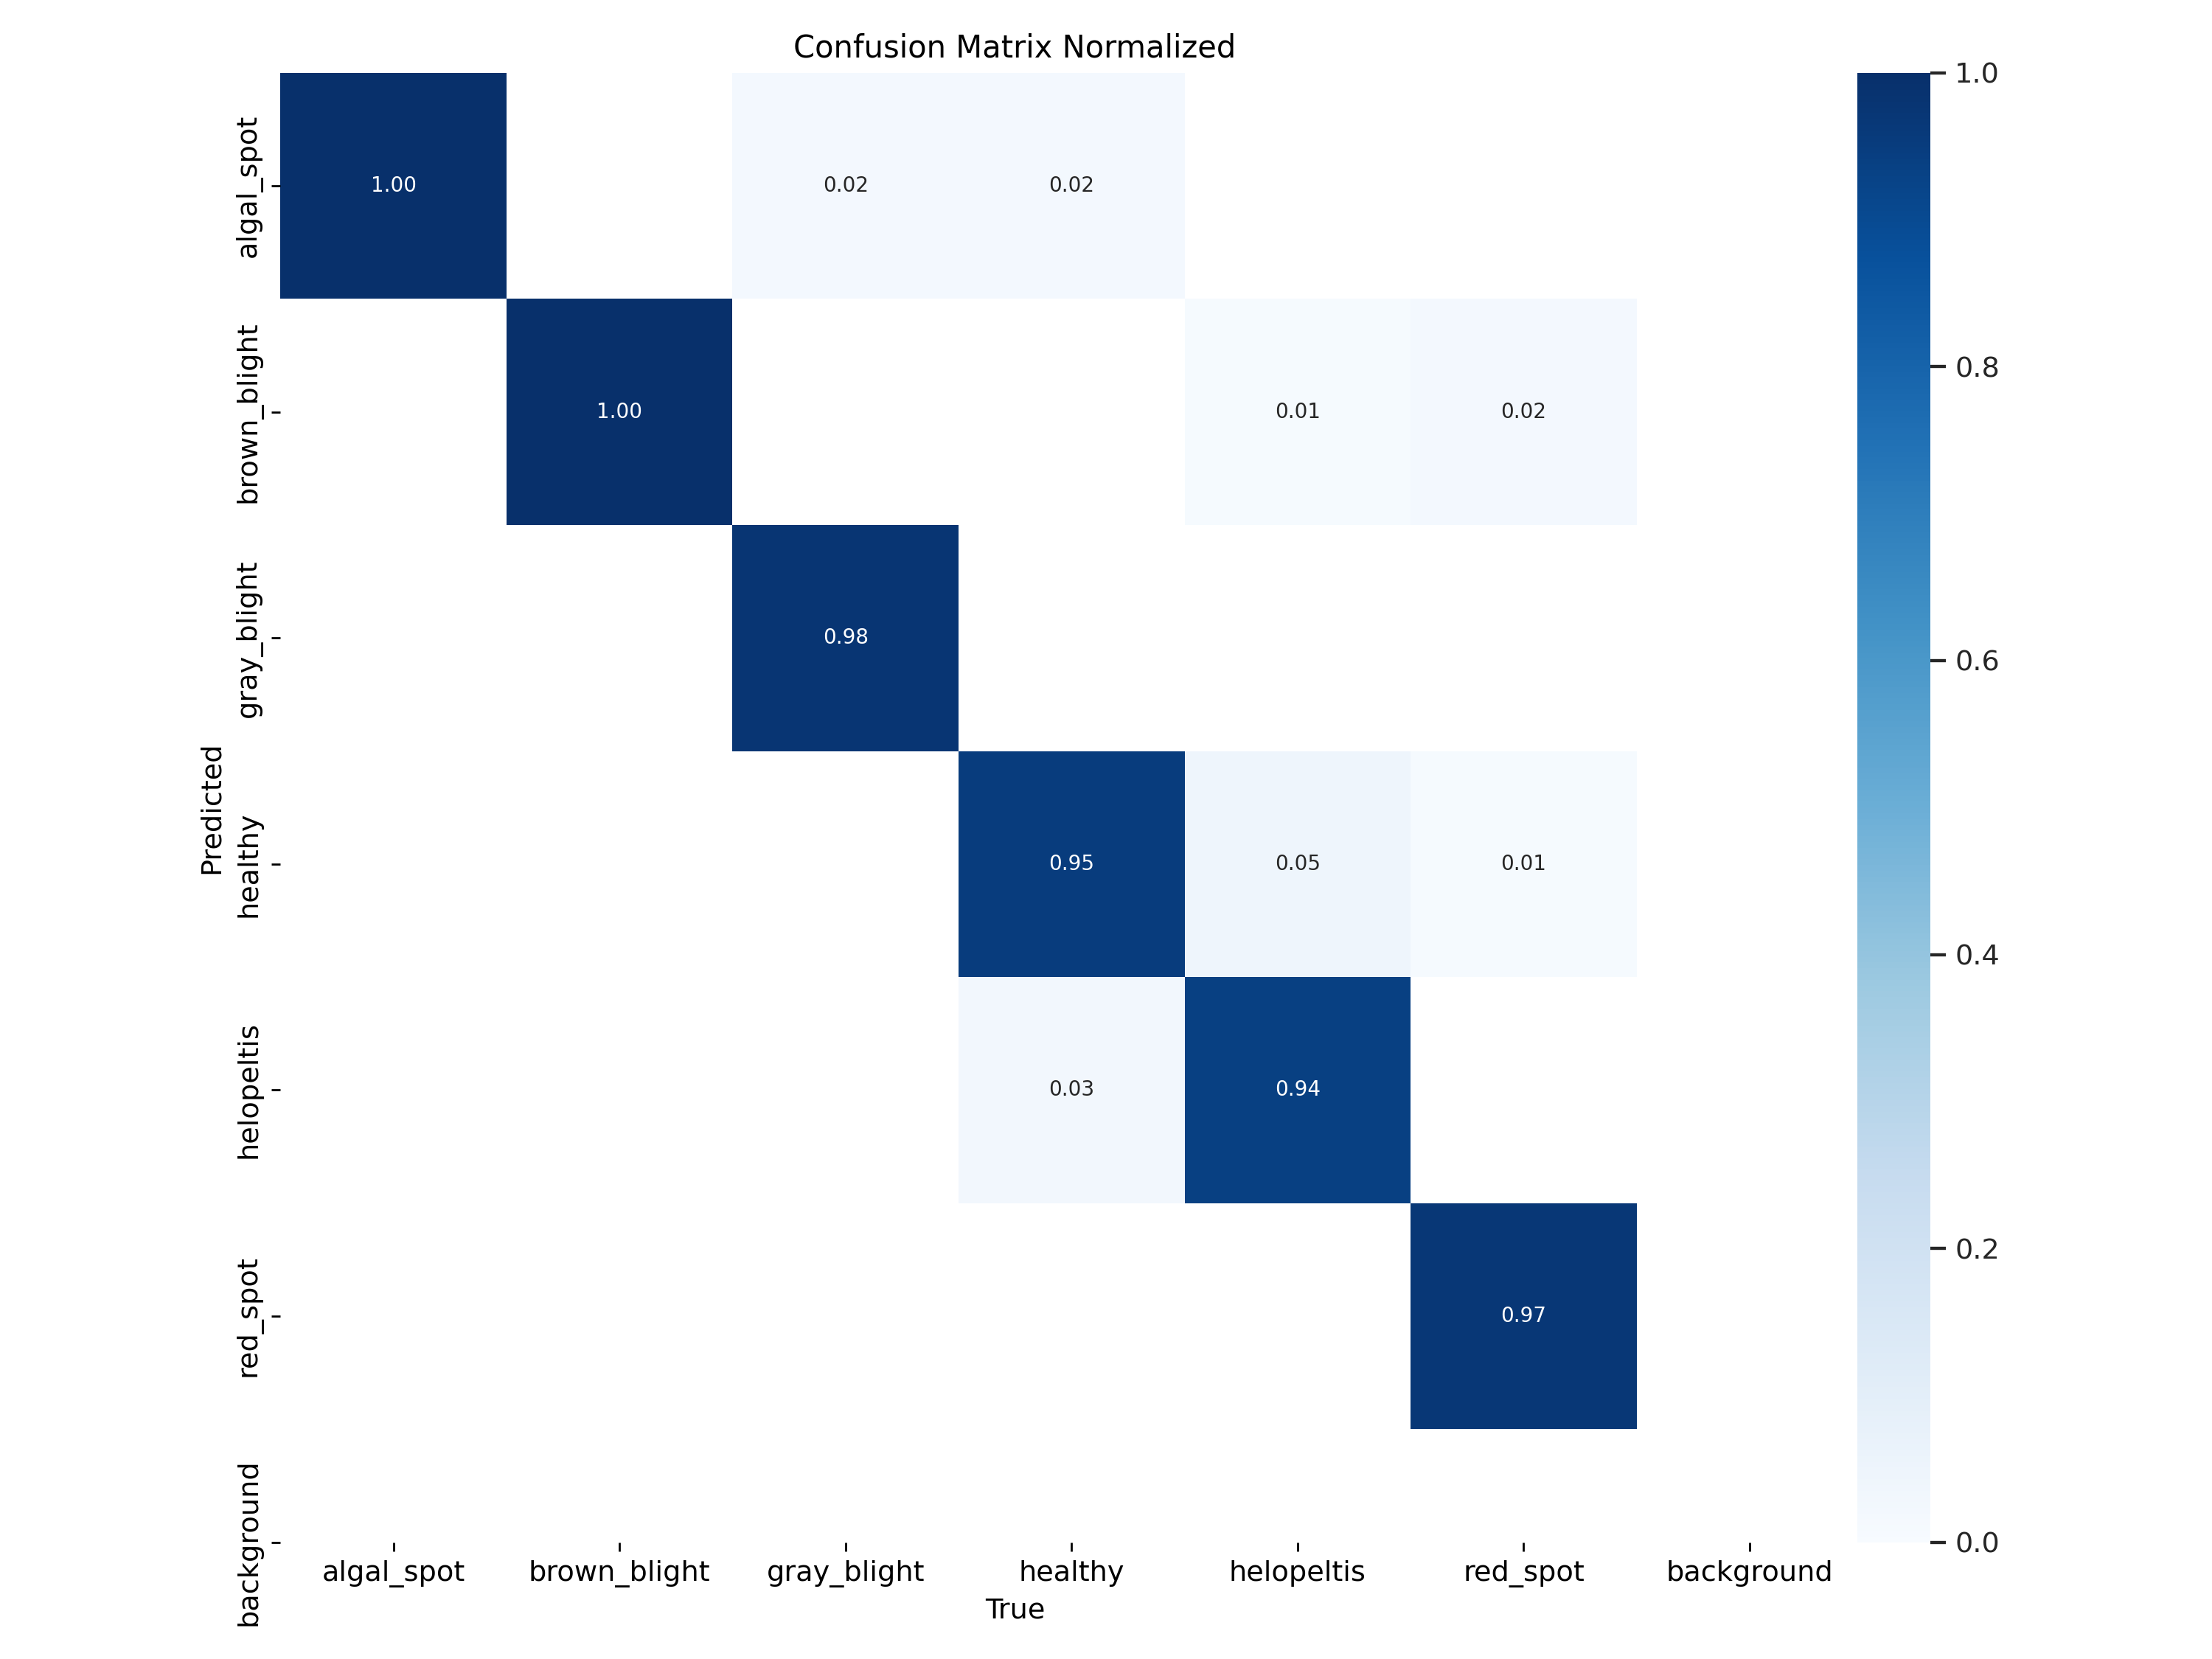

In [ ]:
display(Image(filename="/content/runs/classify/train/confusion_matrix_normalized.png"))

## Inference with Custom Model

In [ ]:
from ultralytics import YOLO

# load a custom model
model = YOLO('/content/runs/classify/train/weights/best.pt')

Demo_Img="/content/IMG_20220503_160734.jpg"

# Predict with the model
results = model(Demo_Img, save=True)


image 1/1 /content/IMG_20220503_160734.jpg: 64x64 brown_blight 0.74, red_spot 0.14, healthy 0.07, algal_spot 0.06, gray_blight 0.00, 2.8ms
Speed: 0.7ms preprocess, 2.8ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/predict3


## Download the Model

In [ ]:
# Trigger the download
files.download('/content/runs/classify/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>